<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#3BB9FF ;font-family:newtimeroman;color:white;font-size:250%;text-align:center;border-radius:50px 1px;">  TITANIC SURVIVAL PREDICTION  </p>
 
 <ul style = color:#25383C;font-size:150%;font-family:Serif;>
    <li> Import librarries </li>
    <li> Read dataset</li>
    <li> Data cleaning</li>
    <li> Data visualization</li>
    <li> Import librarries Of Machine Learning</li>
    <li> Data preprocessing</li>
</ul>

In [1]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read  Data 
df = pd.read_csv('titanic.csv')

In [3]:
# Data Exploration
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


--------------------------------------------------------
- data :
    - colums = 12
    - rows = 418

- we have null values in : Age , Cabin , Fare 


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Data Cleaning


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
list1 = []
for i in df['Sex']:
  if i == "male":
    Sex = 1
  else:
    Sex = 0
  list1.append(Sex)
print(list1)

[1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 

In [9]:
df['Gender'] = list1
df.drop('Sex', axis = 1, inplace = True)
df.drop('Ticket', axis = 1, inplace = True)
df.drop('Name', axis = 1, inplace = True)
df.drop('Cabin', axis = 1, inplace = True)
df.drop('Embarked', axis = 1, inplace = True)

In [10]:
df['Age'].value_counts().index[0]

21.0

In [11]:
df['Age'].fillna(df['Age'].value_counts().index[0],inplace=True)

In [12]:
df['Fare'].fillna(df['Fare'].value_counts().index[0],inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Gender         0
dtype: int64

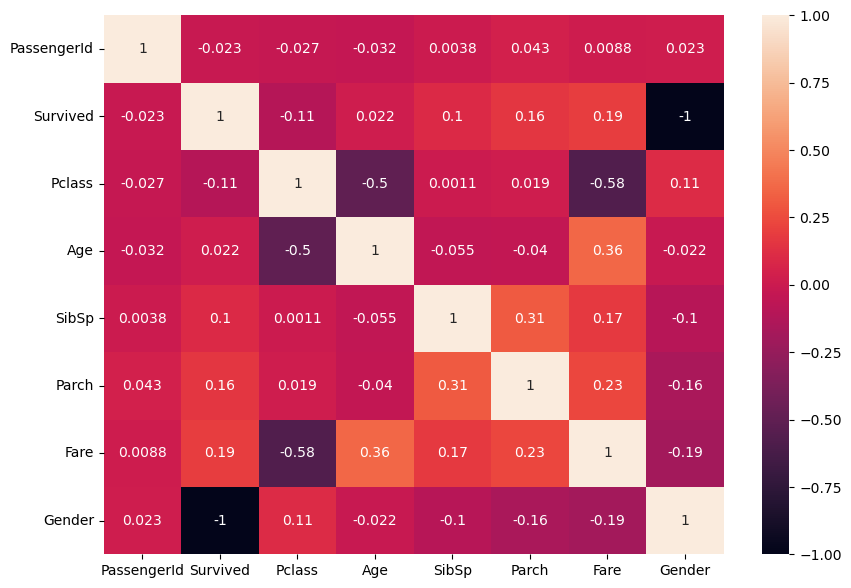

In [14]:
# lets check the Correlation Heat Map of the Data
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [15]:
df.corr()['Survived']

PassengerId   -0.023245
Survived       1.000000
Pclass        -0.108615
Age            0.021962
SibSp          0.099943
Parch          0.159120
Fare           0.192229
Gender        -1.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

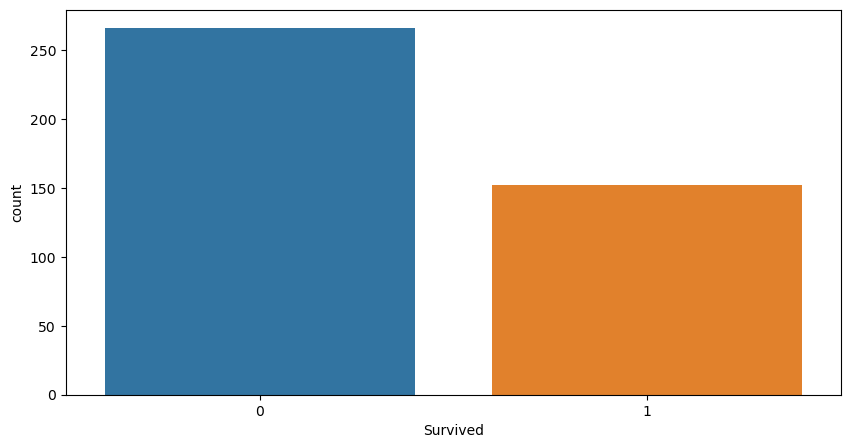

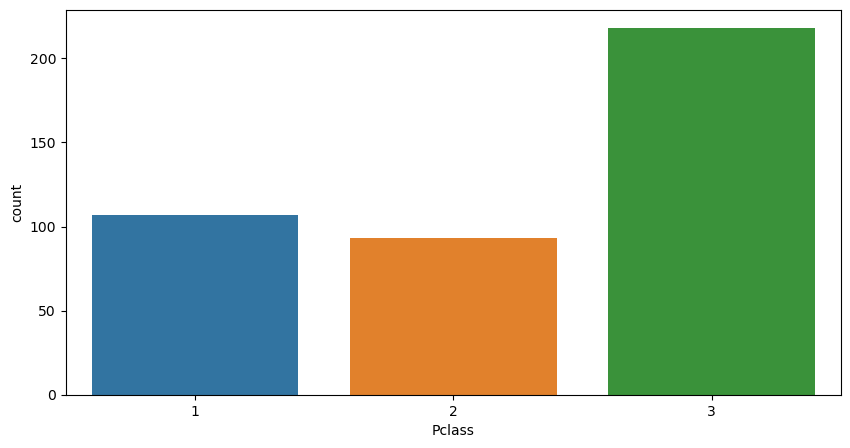

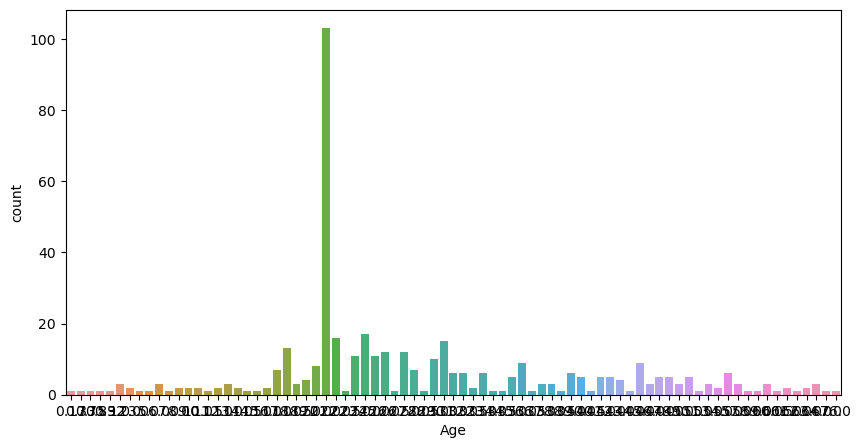

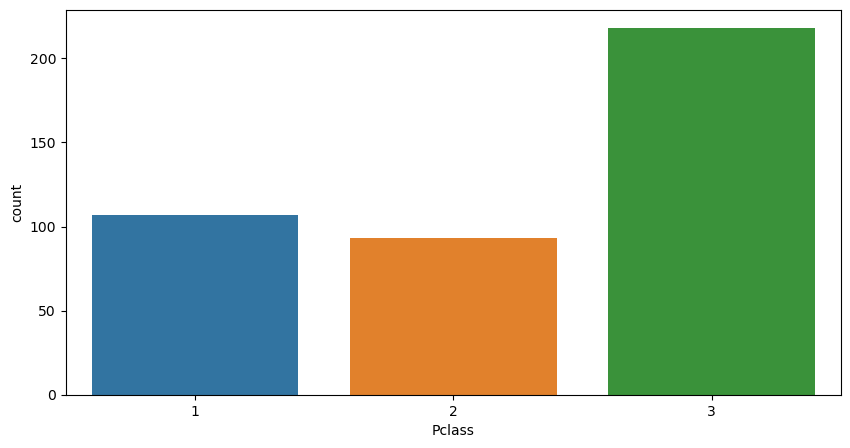

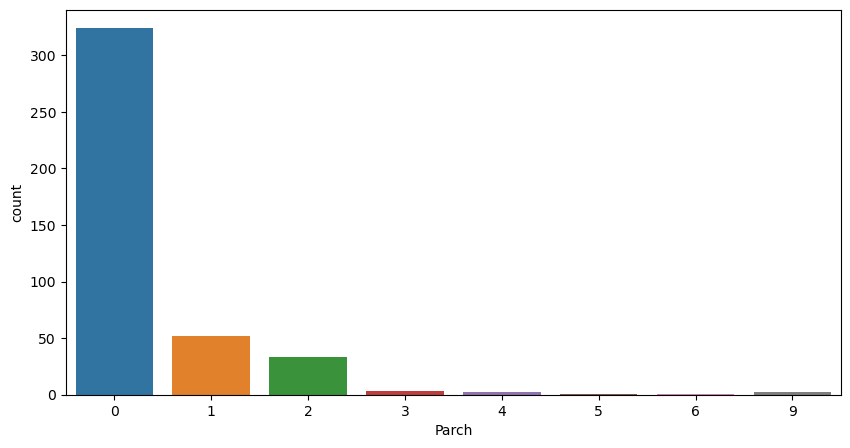

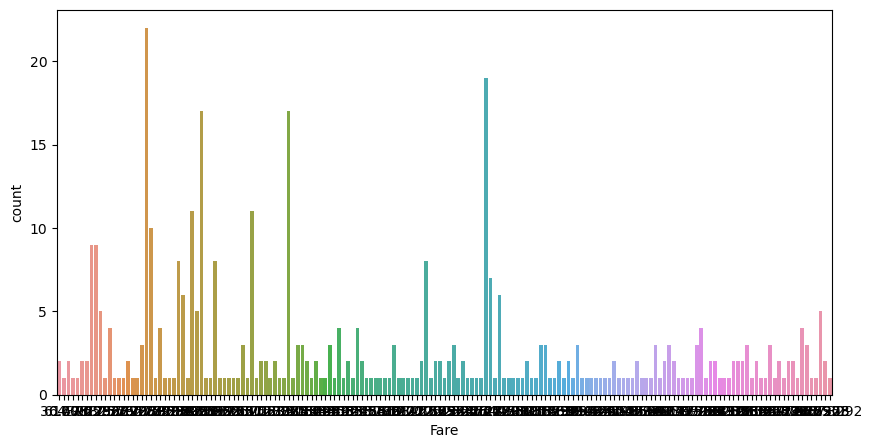

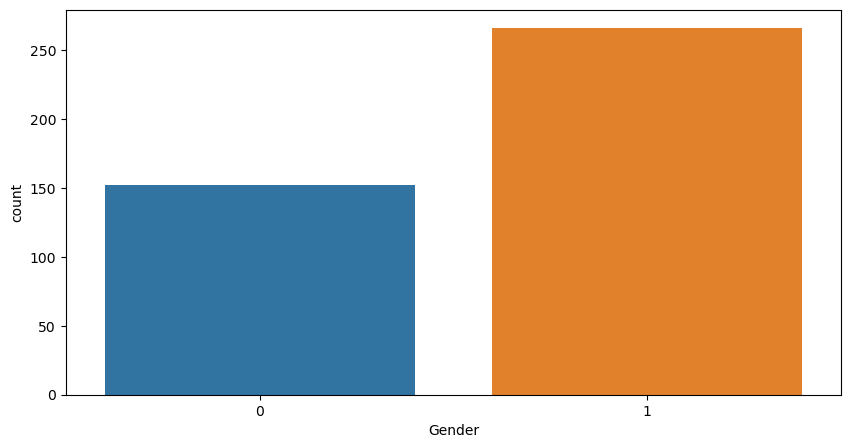

In [16]:
plt.figure(figsize=(10,5))
sns.countplot('Survived',data=df)
plt.figure(figsize=(10,5))
sns.countplot('Pclass',data=df)
plt.figure(figsize=(10,5))
sns.countplot('Age',data=df)
plt.figure(figsize=(10,5))
sns.countplot('Pclass',data=df)
plt.figure(figsize=(10,5))
sns.countplot('Parch',data=df)
plt.figure(figsize=(10,5))
sns.countplot('Fare',data=df)
plt.figure(figsize=(10,5))
sns.countplot('Gender',data=df)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [18]:
# encoding 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Gender       418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Gender'],
      dtype='object')

In [20]:
x = df.drop('Survived',axis = 1)
y = df[['Survived']]

In [21]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, random_state=0)

In [22]:
x_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
208,1100,1,33.0,0,0,27.7208,0
56,948,3,35.0,0,0,7.8958,1
8,900,3,18.0,0,0,7.2292,0
315,1207,3,17.0,0,0,7.7333,0
155,1047,3,24.0,0,0,7.5500,1
...,...,...,...,...,...,...,...
323,1215,1,33.0,0,0,26.5500,1
192,1084,3,11.5,1,1,14.5000,1
117,1009,3,1.0,1,1,16.7000,0
47,939,3,21.0,0,0,7.7500,1


In [23]:
y_train

,Survived
208,1
56,0
8,1
315,1
155,0
...,...
323,0
192,0
117,1
47,0


In [24]:
model = LogisticRegression()
model.fit(x_train , y_train)

LogisticRegression()

In [25]:
# predict and accuracy
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [26]:
accuracy_score(y_test,y_pred)

1.0

In [27]:
# model 
model = DecisionTreeClassifier()

model.fit(x_train , y_train)

DecisionTreeClassifier()

In [28]:
# predict and accuracy
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [29]:
accuracy_score(y_test,y_pred)

1.0